In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("weather_data_full_addedv1.csv")
df.head(2)

,Station_Name,Latitude,Longitude,Elevation,Date,Year,Month,Day,Precipitation_mm,Flag,Nino3.4_SST,DMI,Climate_Index_2,Sunspot_Number,U_Wind_850_Mean,All_India_Monthly_Rainfall_mm
0,ANURADHAPURA (METEO),8.33N,80.38E,92.5M,1/1/1970,1970,1,1,6.8,NaN,27.095648,0.297,-1.256,163,-3.855421,16.9
1,ANURADHAPURA (METEO),8.33N,80.38E,92.5M,1/2/1970,1970,1,2,2.7,NaN,27.095648,0.297,-1.256,118,-4.491479,16.9


In [4]:
df.tail(2)

,Station_Name,Latitude,Longitude,Elevation,Date,Year,Month,Day,Precipitation_mm,Flag,Nino3.4_SST,DMI,Climate_Index_2,Sunspot_Number,U_Wind_850_Mean,All_India_Monthly_Rainfall_mm
88881,VAVUNIYA,8.75N,80.50E,106.0M,12/29/1999,1999,12,29,0.0,T,25.013083,-0.148,1.37,103,-2.429282,4.0
88882,VAVUNIYA,8.75N,80.50E,106.0M,12/30/1999,1999,12,30,0.0,T,25.013083,-0.148,1.37,66,-1.902982,4.0


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Station_Name                   88883 non-null  object 
 1   Latitude                       88883 non-null  object 
 2   Longitude                      88883 non-null  object 
 3   Elevation                      64938 non-null  object 
 4   Date                           88883 non-null  object 
 5   Year                           88883 non-null  int64  
 6   Month                          88883 non-null  int64  
 7   Day                            88883 non-null  int64  
 8   Precipitation_mm               88369 non-null  float64
 9   Flag                           5205 non-null   object 
 10  Nino3.4_SST                    88883 non-null  float64
 11  DMI                            88883 non-null  float64
 12  Climate_Index_2                88883 non-null 

(88883, 16)

In [6]:
df.isnull().sum()

Station_Name                         0
Latitude                             0
Longitude                            0
Elevation                        23945
Date                                 0
Year                                 0
Month                                0
Day                                  0
Precipitation_mm                   514
Flag                             83678
Nino3.4_SST                          0
DMI                                  0
Climate_Index_2                      0
Sunspot_Number                       0
U_Wind_850_Mean                      0
All_India_Monthly_Rainfall_mm        0
dtype: int64

In [7]:
df[['Year', 'Month', 'Day']].head()


,Year,Month,Day
0,1970,1,1
1,1970,1,2
2,1970,1,3
3,1970,1,4
4,1970,1,5


In [10]:
dmi_All_India_Rainfall_monthly = (
    df[['Year', 'Month', 'DMI','All_India_Monthly_Rainfall_mm']]
    .drop_duplicates()
    .sort_values(['Year', 'Month'])
)
print(dmi_All_India_Rainfall_monthly)


       Year  Month    DMI  All_India_Monthly_Rainfall_mm
0      1970      1  0.297                           16.9
31     1970      2  0.326                           20.7
59     1970      3  0.068                           18.4
90     1970      4  0.219                           24.0
120    1970      5  0.182                           58.0
...     ...    ...    ...                            ...
10804  1999      8  0.023                          202.7
10835  1999      9 -0.050                          187.5
10865  1999     10 -0.190                          126.8
10896  1999     11 -0.116                           16.7
10926  1999     12 -0.148                            4.0

[360 rows x 4 columns]


In [11]:
df[['DMI', 'All_India_Monthly_Rainfall_mm']].describe()


,DMI,All_India_Monthly_Rainfall_mm
count,88883.000000,88883.000000
mean,-0.137343,90.995011
std,0.359205,93.891116
min,-1.108000,0.800000
25%,-0.367000,14.700000
50%,-0.154000,44.100000
75%,0.068000,165.300000
max,1.279000,334.100000


In [12]:
dmi_All_India_Rainfall_monthly[['DMI', 'All_India_Monthly_Rainfall_mm']].describe()


,DMI,All_India_Monthly_Rainfall_mm
count,360.000000,360.000000
mean,-0.141025,90.421111
std,0.354255,93.927820
min,-1.108000,0.800000
25%,-0.367000,14.675000
50%,-0.156500,44.000000
75%,0.066500,159.500000
max,1.279000,334.100000


In [13]:
df[['DMI', 'All_India_Monthly_Rainfall_mm']].isnull().sum()


DMI                              0
All_India_Monthly_Rainfall_mm    0
dtype: int64

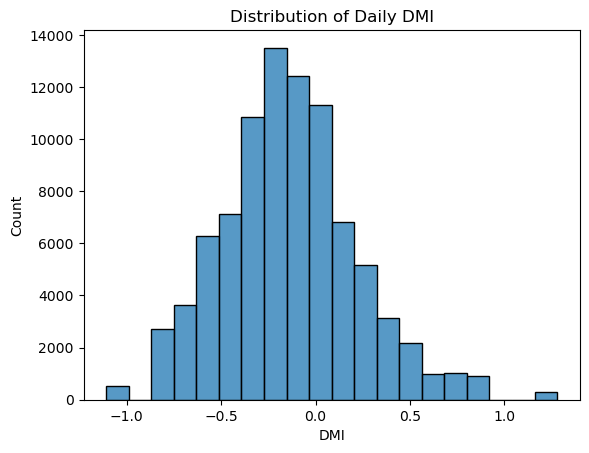

In [14]:
#for all 88883
plt.figure()
sns.histplot(df['DMI'], bins=20)
plt.title("Distribution of Daily DMI")
plt.xlabel("DMI")
plt.show()


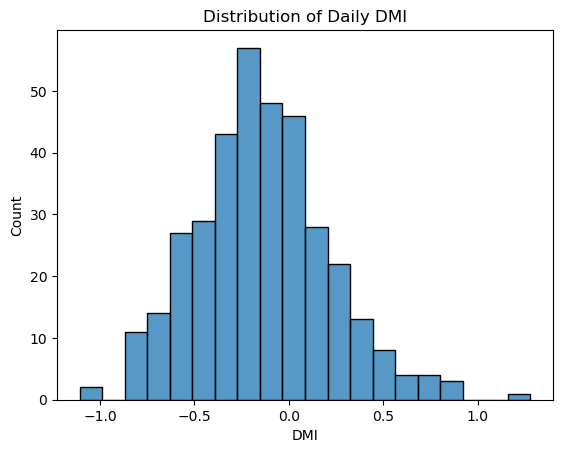

In [103]:
#only for 360
plt.figure()
sns.histplot(dmi_All_India_Rainfall_monthly['DMI'], bins=20)
plt.title("Distribution of Daily DMI")
plt.xlabel("DMI")
plt.show()

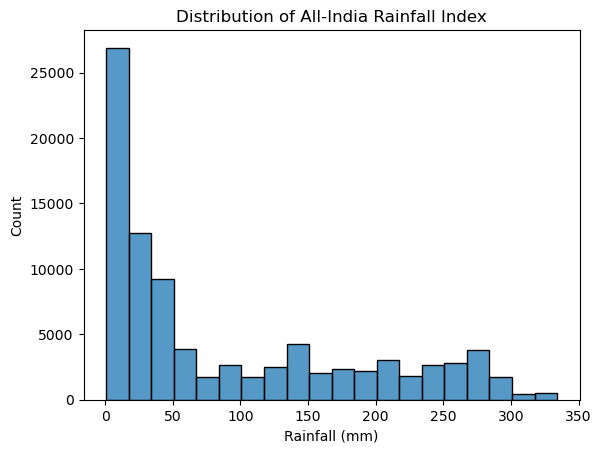

In [42]:
plt.figure()
sns.histplot(df['All_India_Monthly_Rainfall_mm'], bins=20)
plt.title("Distribution of All-India Rainfall Index")
plt.xlabel("Rainfall (mm)")
plt.show()


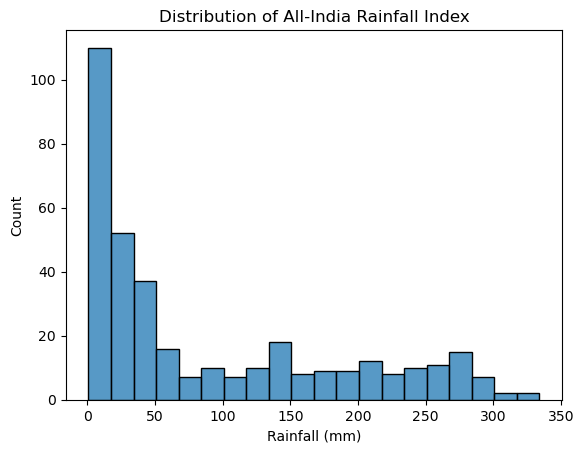

In [104]:
plt.figure()
sns.histplot(dmi_All_India_Rainfall_monthly['All_India_Monthly_Rainfall_mm'], bins=20)
plt.title("Distribution of All-India Rainfall Index")
plt.xlabel("Rainfall (mm)")
plt.show()

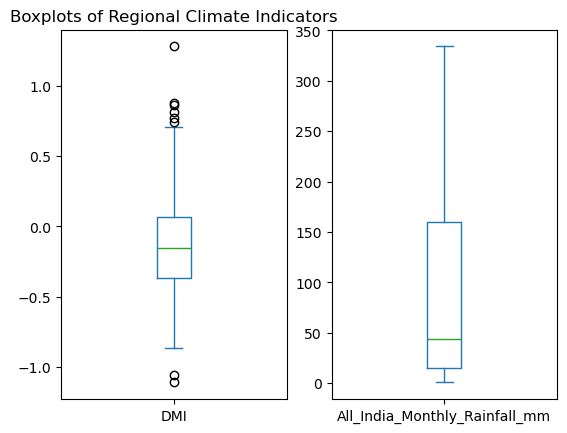

DMI


In [105]:
plt.figure()
plt.subplot(121)
dmi_All_India_Rainfall_monthly['DMI'].plot(kind='box')
plt.title("Boxplots of Regional Climate Indicators")
plt.subplot(122)
dmi_All_India_Rainfall_monthly['All_India_Monthly_Rainfall_mm'].plot(kind='box')
plt.show()
print('DMI')

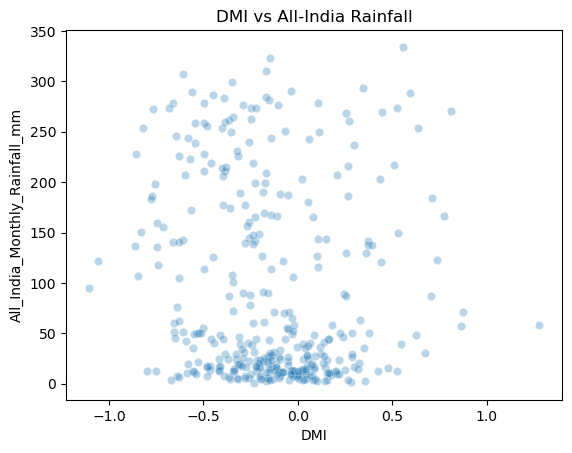

0        0.297
31       0.326
59       0.068
90       0.219
120      0.182
         ...  
10804    0.023
10835   -0.050
10865   -0.190
10896   -0.116
10926   -0.148
Name: DMI, Length: 360, dtype: float64


In [107]:
plt.figure()
sns.scatterplot(
    x=dmi_All_India_Rainfall_monthly['DMI'],
    y=dmi_All_India_Rainfall_monthly['All_India_Monthly_Rainfall_mm'],
    alpha=0.3
)
plt.title("DMI vs All-India Rainfall")
plt.show()
print(dmi_All_India_Rainfall_monthly['DMI'])


In [108]:
corr = dmi_All_India_Rainfall_monthly[['DMI',  'All_India_Monthly_Rainfall_mm']].corr()
corr


,DMI,All_India_Monthly_Rainfall_mm
DMI,1.000000,-0.108006
All_India_Monthly_Rainfall_mm,-0.108006,1.000000


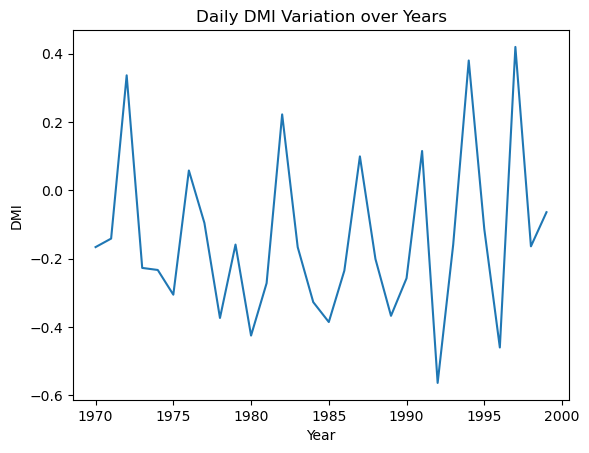

In [109]:
plt.figure()
sns.lineplot(
    x='Year',
    y='DMI',
    data=dmi_All_India_Rainfall_monthly,
    errorbar=None
)
plt.title("Daily DMI Variation over Years")
plt.show()


<h2>one DMI value per month, then plot Year vs DMI.</h2>


In [33]:
#STEP 1: Create a Year–Month DMI series (NO daily noise)
#We will keep only one DMI value per month.

dmi_monthly = (
    df[['Year', 'Month', 'DMI']]
    .drop_duplicates()
    .sort_values(['Year', 'Month'])
)
print(dmi_monthly)
dmi_monthly.shape

       Year  Month    DMI
0      1970      1  0.297
31     1970      2  0.326
59     1970      3  0.068
90     1970      4  0.219
120    1970      5  0.182
...     ...    ...    ...
10804  1999      8  0.023
10835  1999      9 -0.050
10865  1999     10 -0.190
10896  1999     11 -0.116
10926  1999     12 -0.148

[360 rows x 3 columns]


(360, 3)

In [35]:
#STEP 2: Create a proper time variable (for clean plotting)

dmi_monthly['YearMonth'] = pd.to_datetime(
    dmi_monthly['Year'].astype(str) + '-' +
    dmi_monthly['Month'].astype(str) + '-01'
)
dmi_monthly

,Year,Month,DMI,YearMonth
0,1970,1,0.297,1970-01-01
31,1970,2,0.326,1970-02-01
59,1970,3,0.068,1970-03-01
90,1970,4,0.219,1970-04-01
120,1970,5,0.182,1970-05-01
...,...,...,...,...
10804,1999,8,0.023,1999-08-01
10835,1999,9,-0.050,1999-09-01
10865,1999,10,-0.190,1999-10-01
10896,1999,11,-0.116,1999-11-01


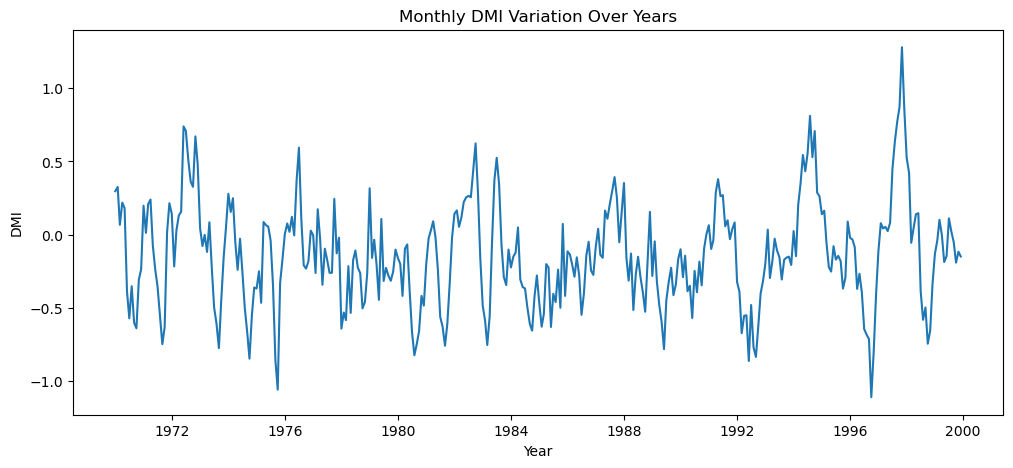

In [36]:
#STEP 3: Plot DMI variation over years (CLEAR visualization)

plt.figure(figsize=(12,5))
plt.plot(dmi_monthly['YearMonth'], dmi_monthly['DMI'])
plt.title("Monthly DMI Variation Over Years")
plt.xlabel("Year")
plt.ylabel("DMI")
plt.show()





In [46]:
#Pivot Table (Year × Month)
#table where rows = Year and columns = Month, and each cell = DMI. 
#This makes it easy to see monthly variation for each year numerically.
dmi_pivot = dmi_monthly.pivot(index='Year', columns='Month', values='DMI')
print(dmi_pivot)


Month     1      2      3      4      5      6      7      8      9      10  \
Year                                                                          
1970   0.297  0.326  0.068  0.219  0.182 -0.385 -0.570 -0.351 -0.600 -0.638   
1971   0.198  0.013  0.208  0.240 -0.074 -0.236 -0.354 -0.547 -0.746 -0.629   
1972   0.143 -0.216  0.031  0.131  0.157  0.739  0.708  0.511  0.363  0.327   
1973   0.043 -0.077 -0.001 -0.117  0.085 -0.225 -0.495 -0.607 -0.773 -0.449   
1974   0.279  0.156  0.249 -0.053 -0.239 -0.027 -0.249 -0.497 -0.661 -0.845   
1975  -0.367 -0.249 -0.464  0.087  0.066  0.055 -0.039 -0.344 -0.857 -1.056   
1976   0.005  0.077  0.020  0.122 -0.004  0.369  0.594  0.107 -0.208 -0.231   
1977  -0.003 -0.261  0.174 -0.029 -0.341 -0.095 -0.171 -0.260 -0.259  0.245   
1978  -0.640 -0.530 -0.582 -0.214 -0.533 -0.174 -0.107 -0.224 -0.261 -0.502   
1979   0.317 -0.158 -0.034 -0.207 -0.444  0.108 -0.315 -0.226 -0.280 -0.314   
1980  -0.158 -0.200 -0.417 -0.095 -0.066 -0.382 -0.6

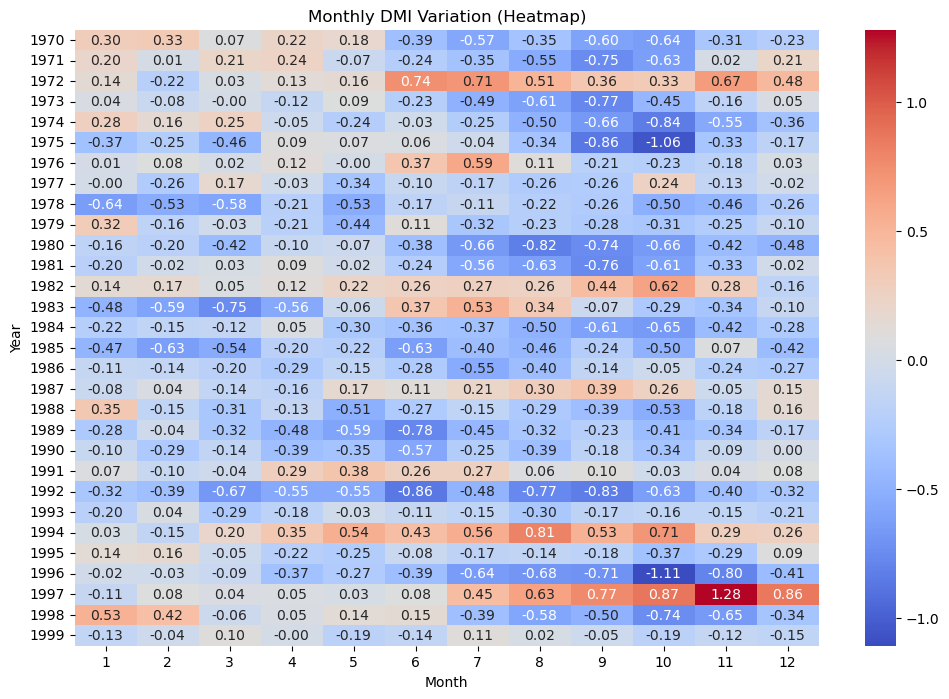

In [47]:
#Heatmap (Year × Month)
#This is basically a visual version of the table. Brightness/color shows DMI intensity. Very clear for seeing seasonal patterns.

plt.figure(figsize=(12,8))
sns.heatmap(dmi_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Monthly DMI Variation (Heatmap)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


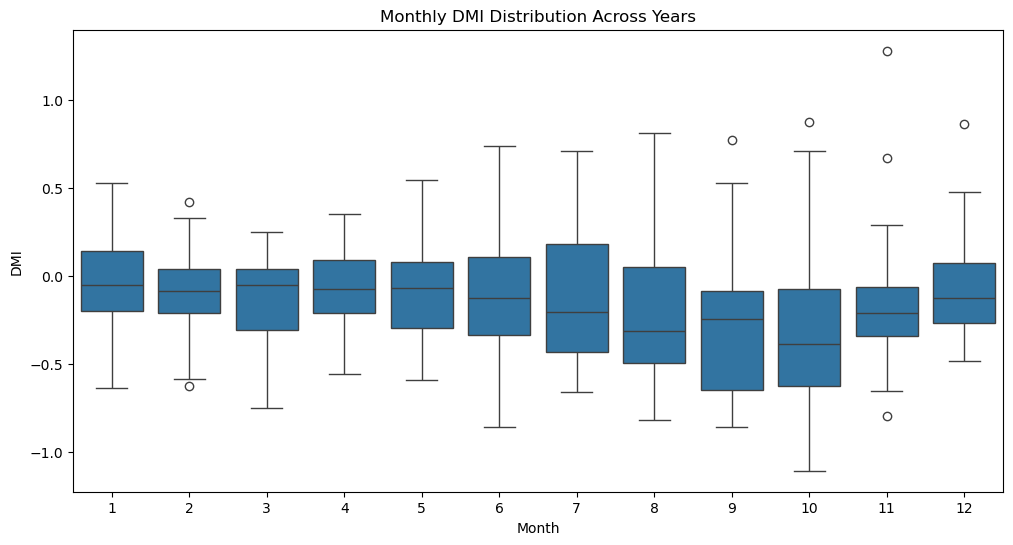

In [48]:
#Boxplot (Month-wise Distribution)
#to see DMI distribution for each month across all years, use a boxplot

plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='DMI', data=dmi_monthly)
plt.title("Monthly DMI Distribution Across Years")
plt.xlabel("Month")
plt.ylabel("DMI")
plt.show()

#Each box shows median, quartiles, and outliers for that month across years.
#Helps identify which months have high/low DMI generally.

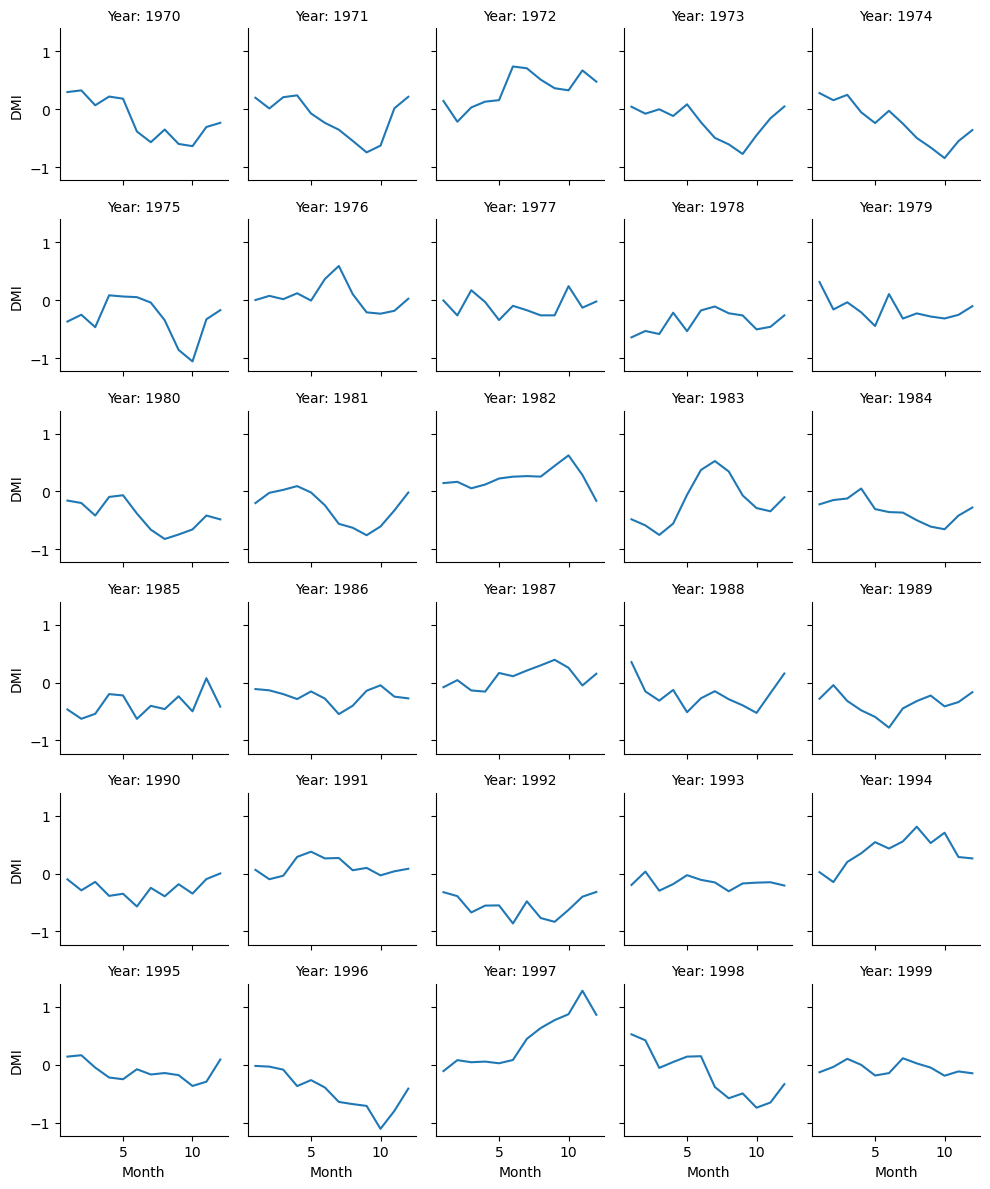

In [49]:
#FacetGrid / Small Multiples
#one subplot per year with 12 points (months).  lines for each year separately.
g = sns.FacetGrid(dmi_monthly, col="Year", col_wrap=5, height=2)
g.map(plt.plot, "Month", "DMI")
g.set_titles("Year: {col_name}")
g.set_axis_labels("Month", "DMI")
plt.show()


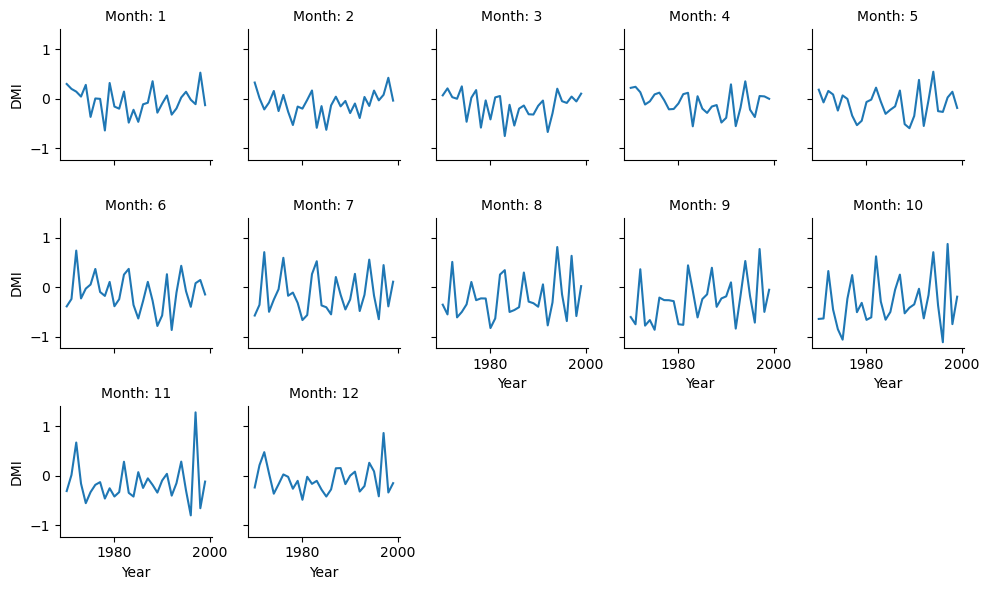

In [110]:
#FacetGrid / Small Multiples
#one subplot per year with 12 points (months).  lines for each year separately.
g = sns.FacetGrid(dmi_monthly, col="Month", col_wrap=5, height=2)
g.map(plt.plot, "Year", "DMI")
g.set_titles("Month: {col_name}")
g.set_axis_labels("Year", "DMI")
plt.show()

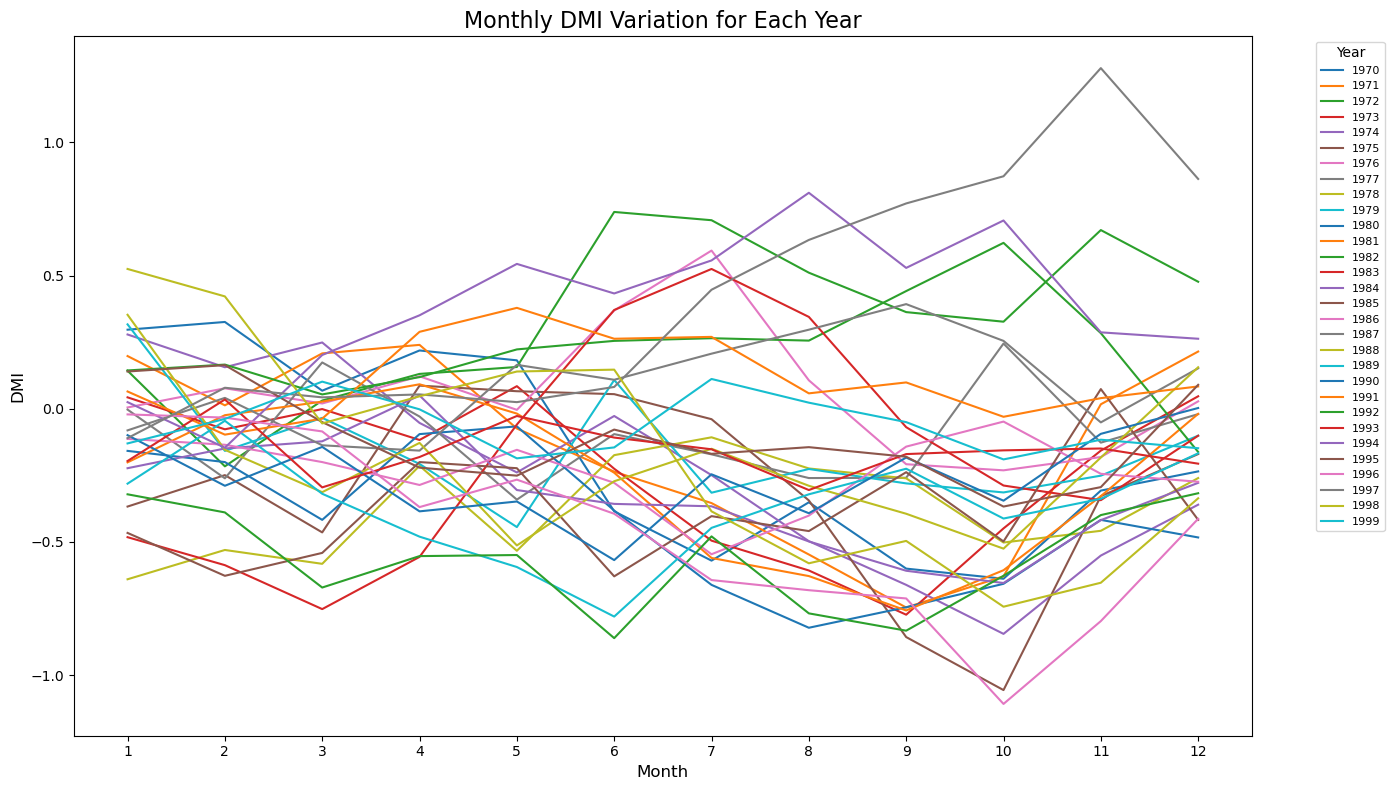

In [51]:
#line plot where each year is a separate line.
plt.figure(figsize=(14,8))

# Plot one line per year
for year in dmi_pivot.index:
    plt.plot(dmi_pivot.columns, dmi_pivot.loc[year], label=str(year))

plt.title("Monthly DMI Variation for Each Year", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("DMI", fontsize=12)
plt.xticks(dmi_pivot.columns)  # Ensure months 1-12 on x-axis
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()


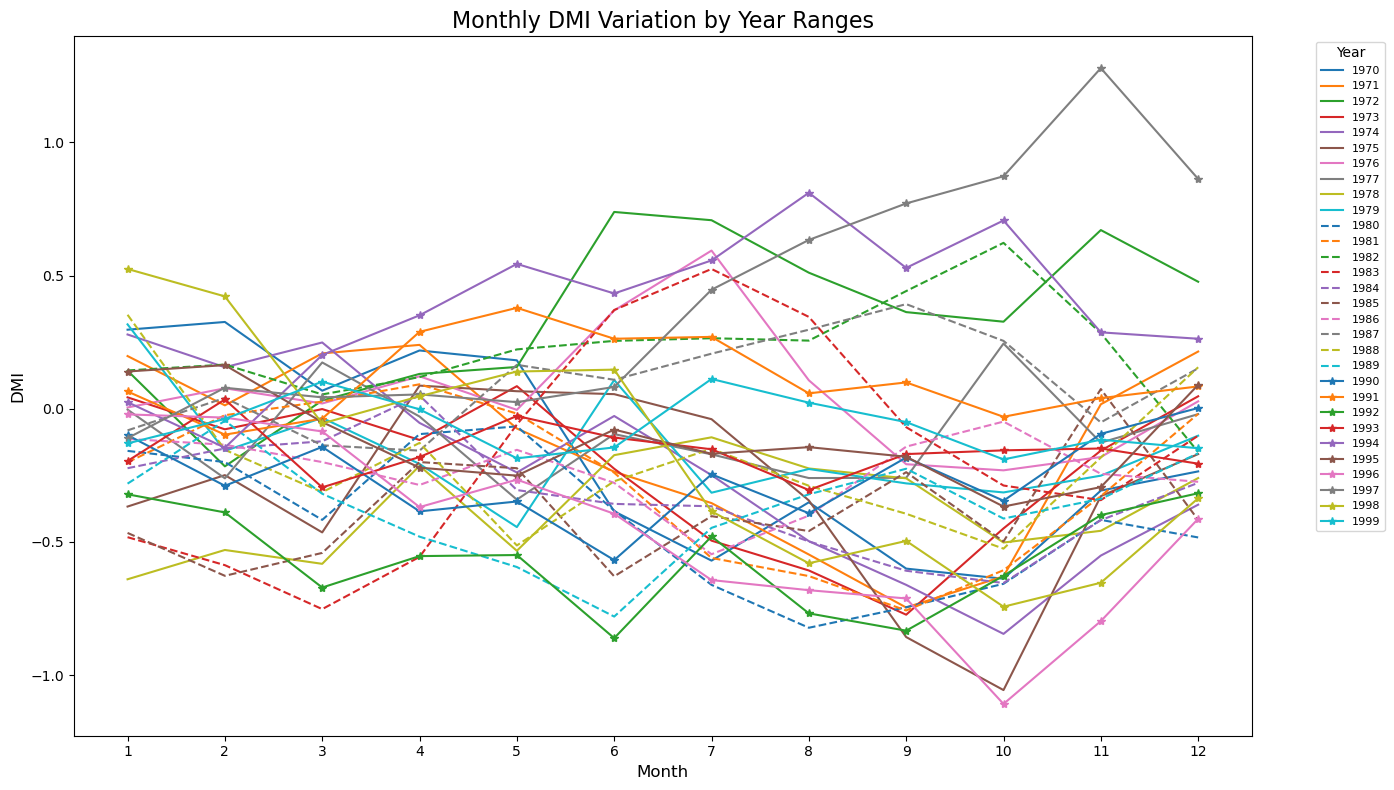

In [62]:
#group years into ranges and use different line styles
plt.figure(figsize=(14,8))

# Loop through each year and assign line style based on year range
for year in dmi_pivot.index:
    if 1970 <= year < 1980:
        style = '-'        # solid line
    elif 1980 <= year < 1990:
        style = '--'       # dashed line
    elif 1990 <= year < 2000:
        style = '*-'       # star markers with line
    else:
        style = ':'        # dotted line for other years

    plt.plot(dmi_pivot.columns, dmi_pivot.loc[year], style, label=str(year))

plt.title("Monthly DMI Variation by Year Ranges", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("DMI", fontsize=12)
plt.xticks(dmi_pivot.columns)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=1)
plt.tight_layout()
plt.show()


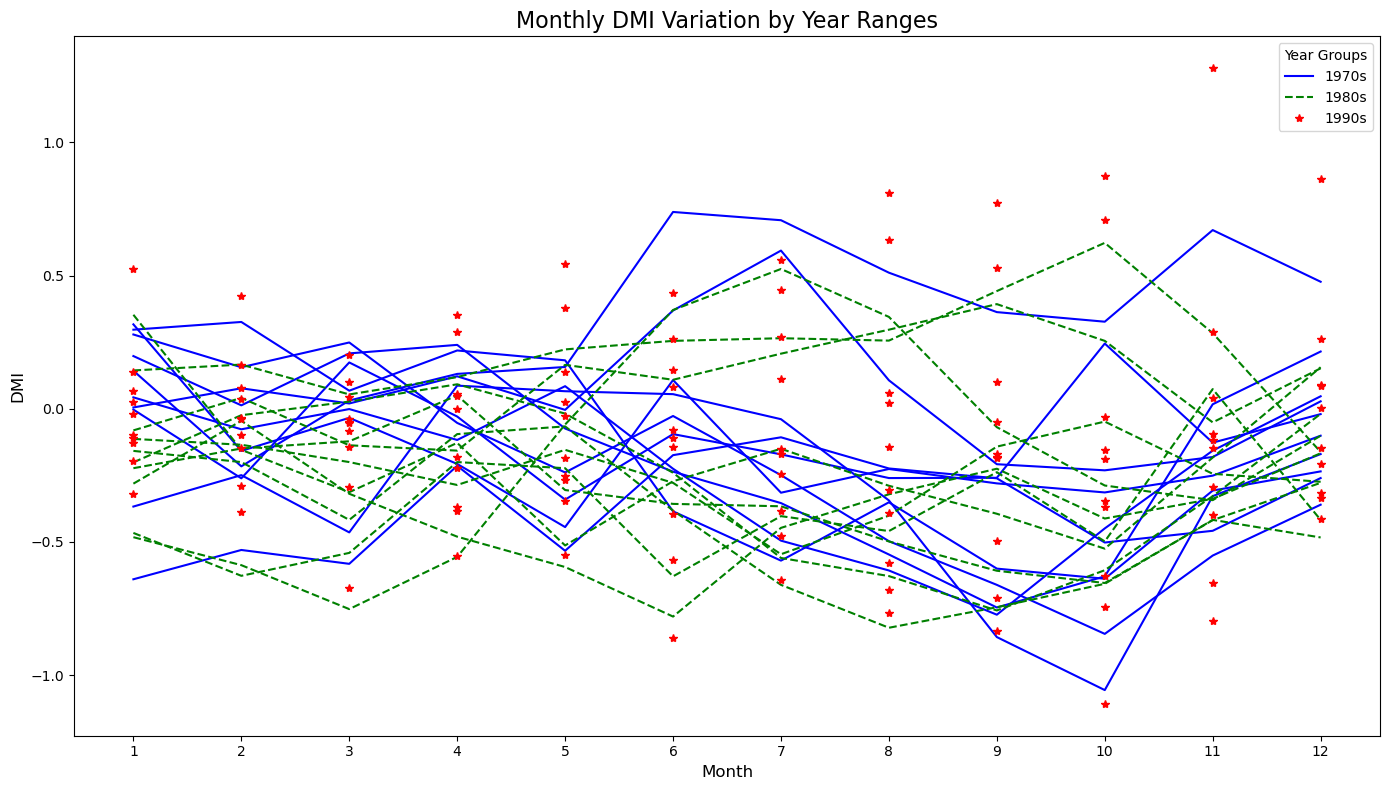

In [63]:
plt.figure(figsize=(14,8))

# Plot by year ranges, but only add legend entries once per group
legend_added = {'1970s': False, '1980s': False, '1990s': False, 'Other': False}

for year in dmi_pivot.index:
    if 1970 <= year < 1980:
        style = '-'
        label = '1970s' if not legend_added['1970s'] else None
        legend_added['1970s'] = True
        plt.plot(dmi_pivot.columns, dmi_pivot.loc[year], style, color='blue', label=label)
    elif 1980 <= year < 1990:
        style = '--'
        label = '1980s' if not legend_added['1980s'] else None
        legend_added['1980s'] = True
        plt.plot(dmi_pivot.columns, dmi_pivot.loc[year], style, color='green', label=label)
    elif 1990 <= year < 2000:
        # Stars only, no connecting line
        label = '1990s' if not legend_added['1990s'] else None
        legend_added['1990s'] = True
        plt.plot(dmi_pivot.columns, dmi_pivot.loc[year], linestyle='None', marker='*', color='red', label=label)
    else:
        style = ':'
        label = 'Other' if not legend_added['Other'] else None
        legend_added['Other'] = True
        plt.plot(dmi_pivot.columns, dmi_pivot.loc[year], style, color='gray', label=label)

plt.title("Monthly DMI Variation by Year Ranges", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("DMI", fontsize=12)
plt.xticks(dmi_pivot.columns)
plt.legend(title="Year Groups", fontsize=10)
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_2976\3341466770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_dmi.index, y=monthly_avg_dmi.values, palette="coolwarm")


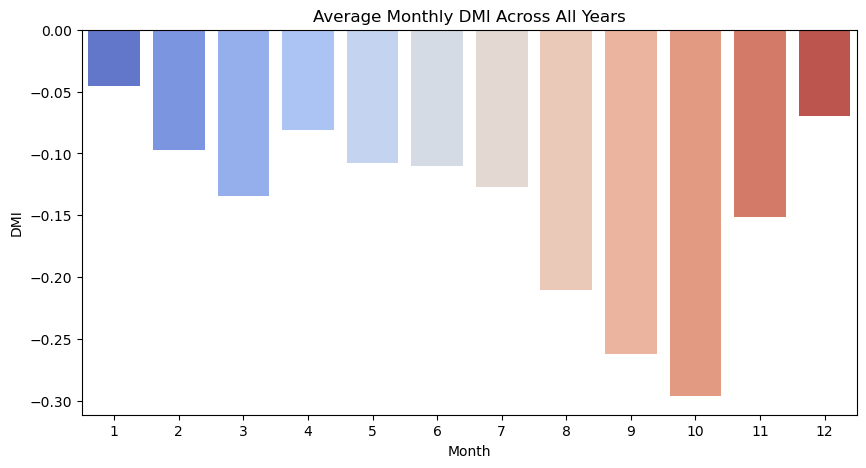

In [64]:
#Seasonal Patterns
#DMI usually has monsoon-related seasonal cycles, so we can summarize it by month across all years to see which months are generally high or low.
# Average DMI by month across all years

monthly_avg_dmi = dmi_monthly.groupby('Month')['DMI'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_avg_dmi.index, y=monthly_avg_dmi.values, palette="coolwarm")
plt.title("Average Monthly DMI Across All Years")
plt.xlabel("Month")
plt.ylabel("DMI")
plt.show()


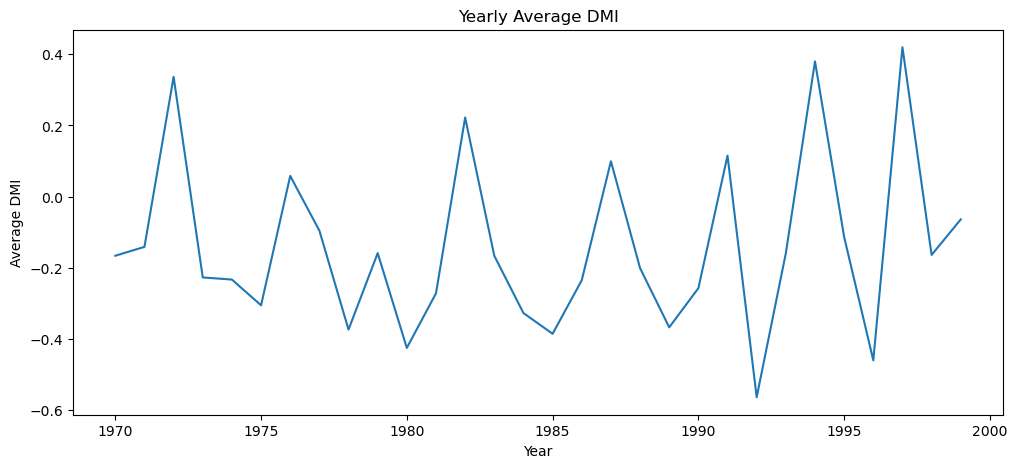

In [65]:
#Yearly Trend
#We can aggregate DMI by year to see if there is a long-term trend (increase/decrease) over decades.
# Average DMI by year
yearly_avg_dmi = dmi_monthly.groupby('Year')['DMI'].mean()

plt.figure(figsize=(12,5))
sns.lineplot(x=yearly_avg_dmi.index, y=yearly_avg_dmi.values)
plt.title("Yearly Average DMI")
plt.xlabel("Year")
plt.ylabel("Average DMI")
plt.show()


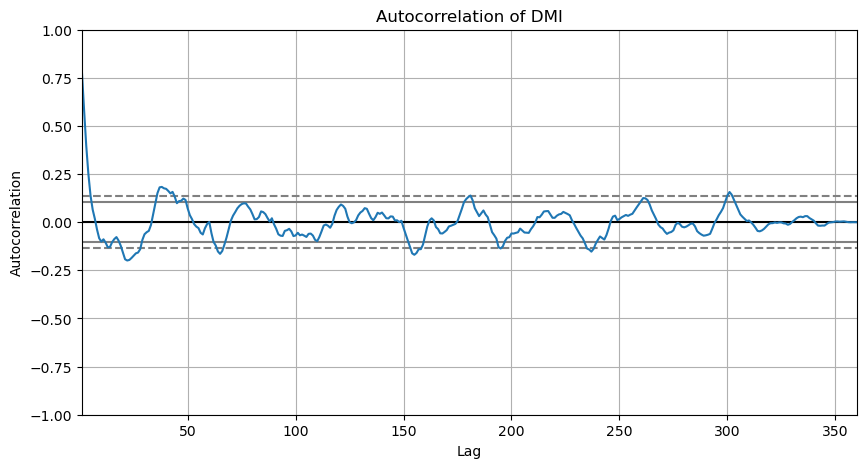

In [67]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10,5))
autocorrelation_plot(dmi_monthly['DMI'])
plt.title("Autocorrelation of DMI")
plt.show()


<h2>All_India_Monthly_Rainfall_mm</h2>

In [70]:
#STEP 1: Create a Year–Month All_India_Monthly_Rainfall_mm series (NO daily noise)
#We will keep only one Rainfall_mm value per month.

India_Rainfall_monthly = (
    df[['Year', 'Month', 'All_India_Monthly_Rainfall_mm']]
    .drop_duplicates()
    .sort_values(['Year', 'Month'])
)
print(India_Rainfall_monthly)
India_Rainfall_monthly.shape

       Year  Month  All_India_Monthly_Rainfall_mm
0      1970      1                           16.9
31     1970      2                           20.7
59     1970      3                           18.4
90     1970      4                           24.0
120    1970      5                           58.0
...     ...    ...                            ...
10804  1999      8                          202.7
10835  1999      9                          187.5
10865  1999     10                          126.8
10896  1999     11                           16.7
10926  1999     12                            4.0

[360 rows x 3 columns]


(360, 3)

In [71]:
#STEP 2: Create a proper time variable (for clean plotting)

India_Rainfall_monthly['YearMonth'] = pd.to_datetime(
    India_Rainfall_monthly['Year'].astype(str) + '-' +
    India_Rainfall_monthly['Month'].astype(str) + '-01'
)
India_Rainfall_monthly

,Year,Month,All_India_Monthly_Rainfall_mm,YearMonth
0,1970,1,16.9,1970-01-01
31,1970,2,20.7,1970-02-01
59,1970,3,18.4,1970-03-01
90,1970,4,24.0,1970-04-01
120,1970,5,58.0,1970-05-01
...,...,...,...,...
10804,1999,8,202.7,1999-08-01
10835,1999,9,187.5,1999-09-01
10865,1999,10,126.8,1999-10-01
10896,1999,11,16.7,1999-11-01


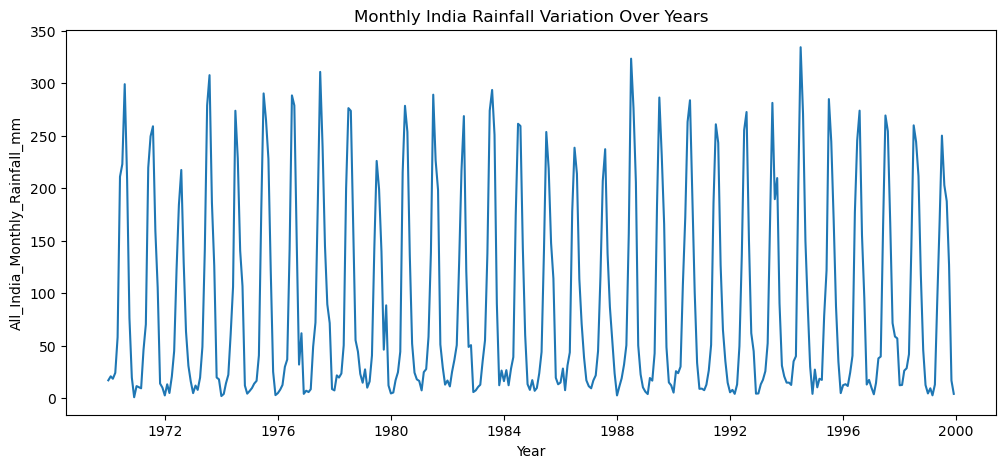

In [72]:
#STEP 3: Plot All_India_Monthly_Rainfall_mm variation over years (CLEAR visualization)

plt.figure(figsize=(12,5))
plt.plot(India_Rainfall_monthly['YearMonth'], India_Rainfall_monthly['All_India_Monthly_Rainfall_mm'])
plt.title("Monthly India Rainfall Variation Over Years")
plt.xlabel("Year")
plt.ylabel("All_India_Monthly_Rainfall_mm")
plt.show()


In [73]:
#Pivot Table (Year × Month)
#table where rows = Year and columns = Month, and each cell = All_India_Monthly_Rainfall_mm. 
#This makes it easy to see monthly variation for each year numerically.
India_Rainfall_monthly_pivot = India_Rainfall_monthly.pivot(index='Year', columns='Month', values='All_India_Monthly_Rainfall_mm')
print(India_Rainfall_monthly_pivot)

Month    1     2     3     4      5      6      7      8      9      10    11  \
Year                                                                            
1970   16.9  20.7  18.4  24.0   58.0  210.8  222.8  298.9  207.3   76.2  19.4   
1971   11.4  10.3   9.3  46.0   70.2  219.4  249.3  258.8  159.3  105.2  13.8   
1972    2.5  13.1   4.8  20.6   44.8  122.6  183.8  217.2  129.2   63.3  30.8   
1973    4.7  11.9   7.8  19.5   48.8  141.2  278.7  307.5  186.0  125.9  19.6   
1974    1.9   3.9  13.9  22.2   60.6  105.9  273.6  228.2  140.3  106.6  11.9   
1975    6.7   9.6  13.7  16.4   40.6  180.1  290.1  264.7  227.8  121.7  25.0   
1976    4.7   8.1  12.5  29.8   36.7  141.9  288.2  278.6  148.1   31.9  61.7   
1977    7.0   5.7   8.4  48.9   71.9  188.3  310.6  239.5  144.8   89.3  71.4   
1978    7.3  21.6  19.5  23.4   50.3  199.6  276.1  273.5  160.1   55.1  44.2   
1979   14.6  27.3   9.9  15.8   40.5  143.4  225.8  199.0  139.5   46.1  88.3   
1980    4.4   5.3  16.9  24.

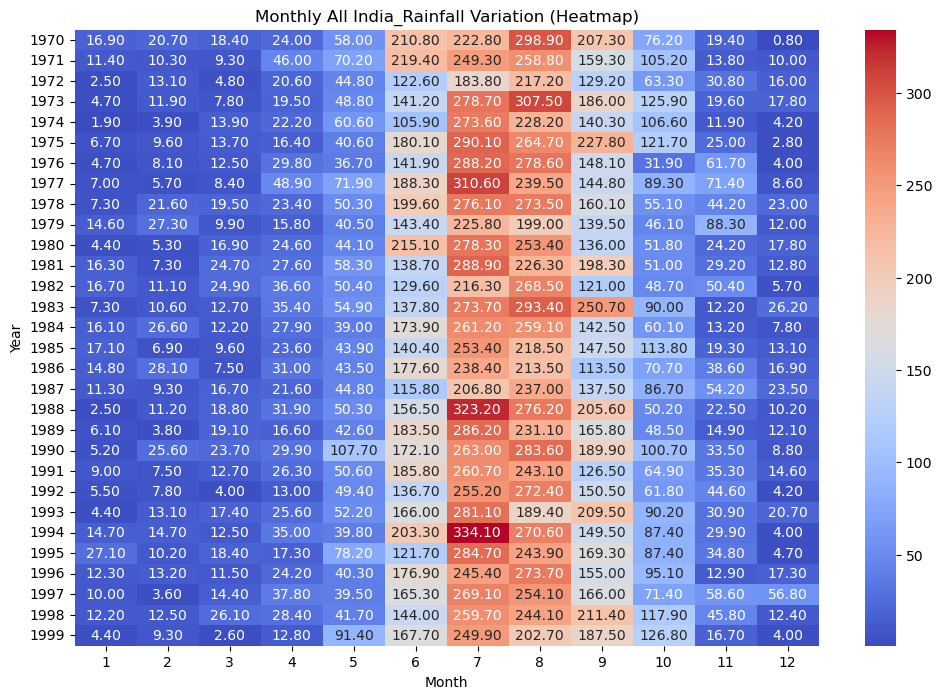

In [75]:
#Heatmap (Year × Month)
#This is basically a visual version of the table. Brightness/color shows All_India_Monthly_Rainfall_mm intensity. Very clear for seeing seasonal patterns.

plt.figure(figsize=(12,8))
sns.heatmap(India_Rainfall_monthly_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Monthly All India_Rainfall Variation (Heatmap)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

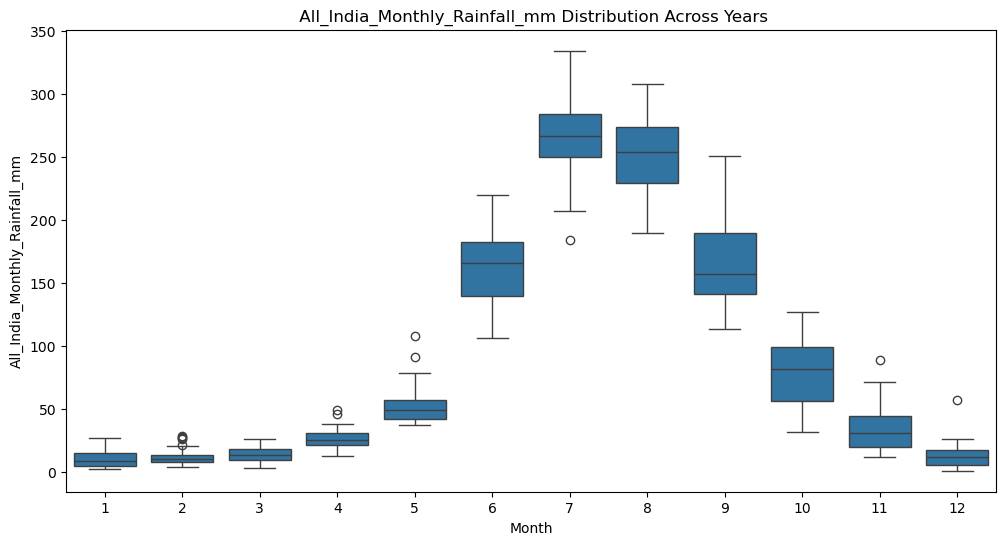

In [76]:
#Boxplot (Month-wise Distribution)
#to see All_India_Monthly_Rainfall_mm distribution for each month across all years, use a boxplot

plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='All_India_Monthly_Rainfall_mm', data=India_Rainfall_monthly)
plt.title(" All_India_Monthly_Rainfall_mm Distribution Across Years")
plt.xlabel("Month")
plt.ylabel("All_India_Monthly_Rainfall_mm")
plt.show()

#Each box shows median, quartiles, and outliers for that month across years.
#Helps identify which months have high/low All_India_Monthly_Rainfall_mm generally.

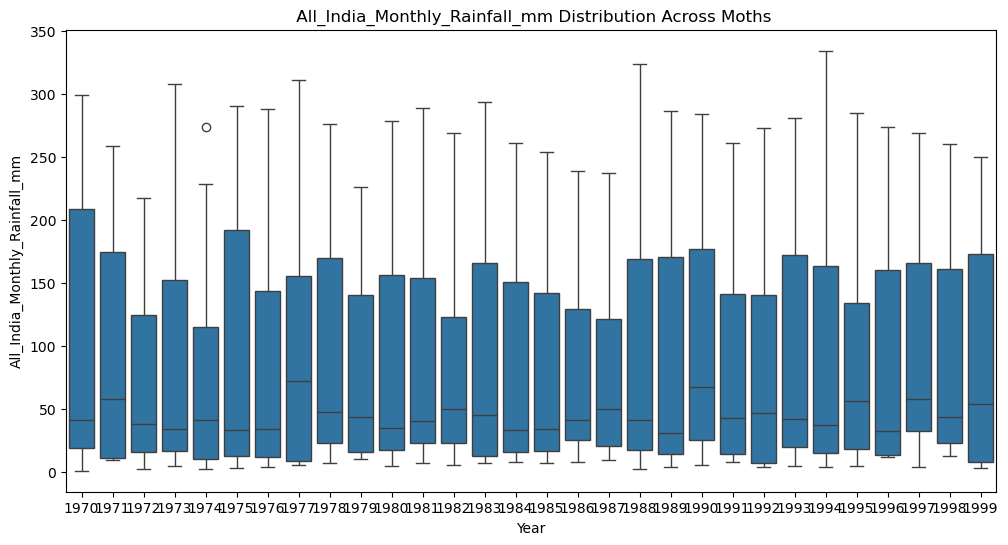

    Year  Month  All_India_Monthly_Rainfall_mm  YearMonth
0   1970      1                           16.9 1970-01-01
31  1970      2                           20.7 1970-02-01


In [80]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='All_India_Monthly_Rainfall_mm', data=India_Rainfall_monthly)
plt.title(" All_India_Monthly_Rainfall_mm Distribution Across Moths")
plt.xlabel("Year")
plt.ylabel("All_India_Monthly_Rainfall_mm")
plt.show()
print(India_Rainfall_monthly.head(2))

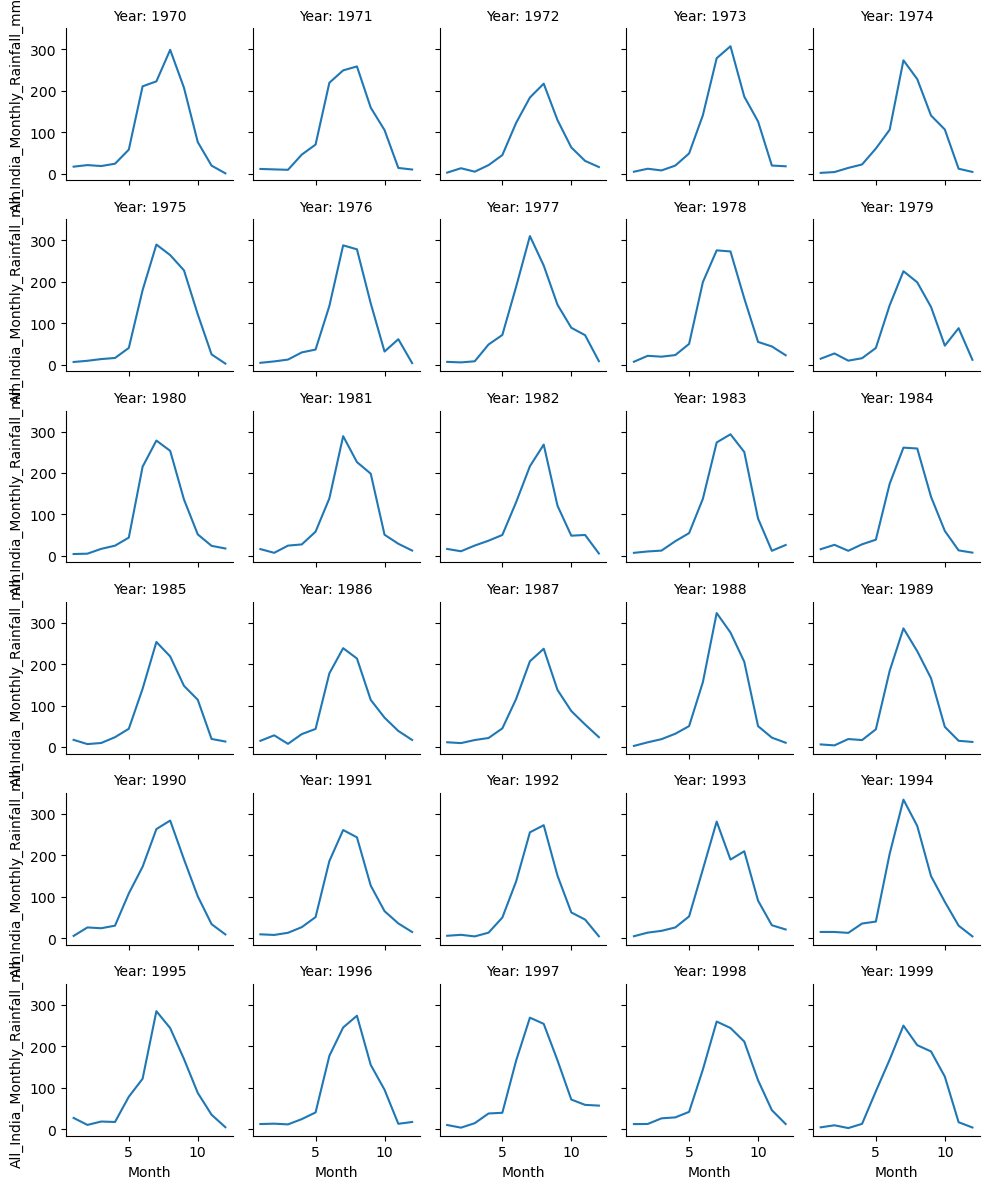

In [77]:
#FacetGrid / Small Multiples
#one subplot per year with 12 points (months).  lines for each year separately.
g = sns.FacetGrid(India_Rainfall_monthly, col="Year", col_wrap=5, height=2)
g.map(plt.plot, "Month", "All_India_Monthly_Rainfall_mm")
g.set_titles("Year: {col_name}")
g.set_axis_labels("Month", "All_India_Monthly_Rainfall_mm")
plt.show()

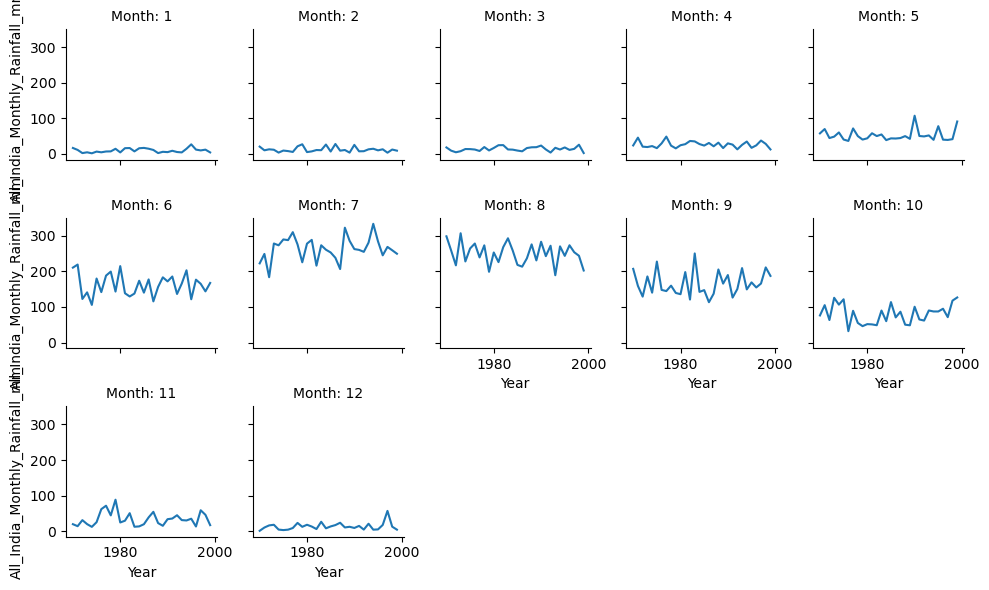

In [81]:
g = sns.FacetGrid(India_Rainfall_monthly, col="Month", col_wrap=5, height=2)
g.map(plt.plot, "Year", "All_India_Monthly_Rainfall_mm")
g.set_titles("Month: {col_name}")
g.set_axis_labels("Year", "All_India_Monthly_Rainfall_mm")
plt.show()

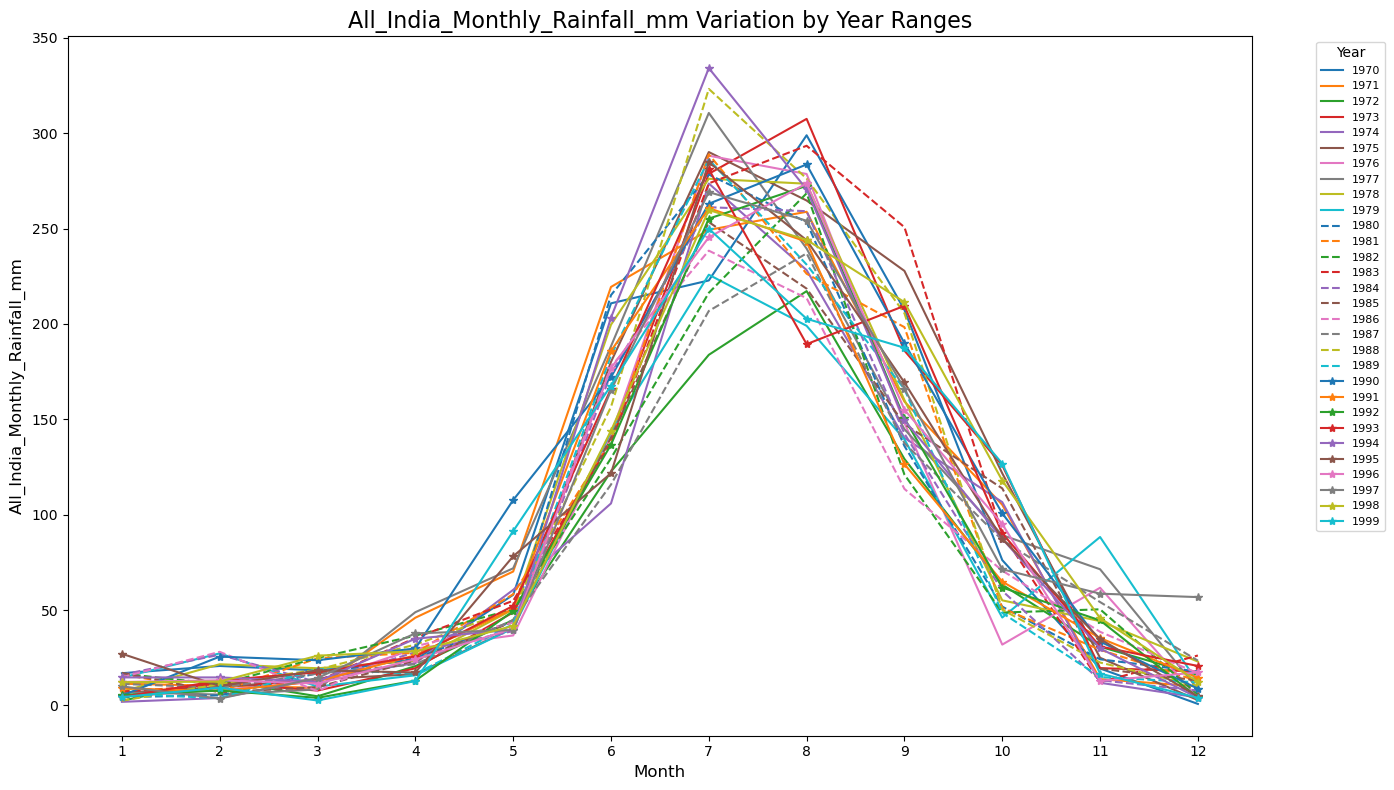

In [78]:
#group years into ranges and use different line styles
plt.figure(figsize=(14,8))

# Loop through each year and assign line style based on year range
for year in India_Rainfall_monthly_pivot.index:
    if 1970 <= year < 1980:
        style = '-'        # solid line
    elif 1980 <= year < 1990:
        style = '--'       # dashed line
    elif 1990 <= year < 2000:
        style = '*-'       # star markers with line
    else:
        style = ':'        # dotted line for other years

    plt.plot(India_Rainfall_monthly_pivot.columns, India_Rainfall_monthly_pivot.loc[year], style, label=str(year))

plt.title("All_India_Monthly_Rainfall_mm Variation by Year Ranges", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("All_India_Monthly_Rainfall_mm", fontsize=12)
plt.xticks(India_Rainfall_monthly_pivot.columns)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, ncol=1)
plt.tight_layout()
plt.show()

In [96]:
dmi_monthly[['DMI']].describe()


,DMI
count,360.000000
mean,-0.141025
std,0.354255
min,-1.108000
25%,-0.367000
50%,-0.156500
75%,0.066500
max,1.279000


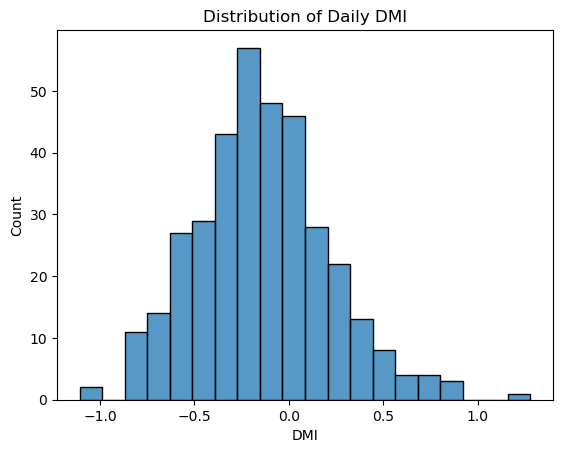

In [97]:
plt.figure()
sns.histplot(dmi_monthly['DMI'], bins=20)
plt.title("Distribution of Daily DMI")
plt.xlabel("DMI")
plt.show()


In [98]:
dmi_All_India_Rainfall_monthly = (
    df[['Year', 'Month', 'DMI','All_India_Monthly_Rainfall_mm']]
    .drop_duplicates()
    .sort_values(['Year', 'Month'])
)
print(dmi_All_India_Rainfall_monthly)
dmi_monthly.shape




       Year  Month    DMI  All_India_Monthly_Rainfall_mm
0      1970      1  0.297                           16.9
31     1970      2  0.326                           20.7
59     1970      3  0.068                           18.4
90     1970      4  0.219                           24.0
120    1970      5  0.182                           58.0
...     ...    ...    ...                            ...
10804  1999      8  0.023                          202.7
10835  1999      9 -0.050                          187.5
10865  1999     10 -0.190                          126.8
10896  1999     11 -0.116                           16.7
10926  1999     12 -0.148                            4.0

[360 rows x 4 columns]


(360, 3)